# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


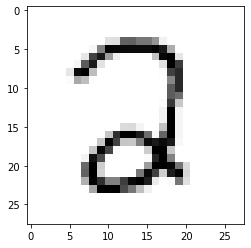

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2539774781920031
train accuracy is: 0.48531130028375896, test accuracy is 0.4889112903225806


Epoch 10 Loss 0.24197381308003998
train accuracy is: 0.6974628609581038, test accuracy is 0.7323588709677419


Epoch 20 Loss 0.20514856808244356
train accuracy is: 0.8644633617092305, test accuracy is 0.8845766129032258


Epoch 30 Loss 0.11068679151631204
train accuracy is: 0.9025204473376732, test accuracy is 0.9112903225806451


Epoch 40 Loss 0.06716261424519249
train accuracy is: 0.9292271740944751, test accuracy is 0.9344758064516129


Epoch 50 Loss 0.051185515907258006
train accuracy is: 0.9418294107828409, test accuracy is 0.9506048387096774


Epoch 60 Loss 0.0433353301691667
train accuracy is: 0.9495075947254215, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.03876921309303774
train accuracy is: 0.9550158571190118, test accuracy is 0.9637096774193549


Epoch 80 Loss 0.03575997865088795
train accuracy is: 0.9582707394424971, test accuracy is 0.9652217741935484


Epoch 90 Loss 0.03357980903690245
train accuracy is: 0.9606075780337172, test accuracy is 0.9657258064516129


Epoch 100 Loss 0.03189352256497514
train accuracy is: 0.9622767484560174, test accuracy is 0.9672379032258065


Epoch 110 Loss 0.03053764946091782
train accuracy is: 0.9641962944416625, test accuracy is 0.9682459677419355


Epoch 120 Loss 0.029399543234463373
train accuracy is: 0.9652812552161576, test accuracy is 0.9692540322580645


Epoch 130 Loss 0.02842982843827964
train accuracy is: 0.9658654648639626, test accuracy is 0.9702620967741935


Epoch 140 Loss 0.027579553680122566
train accuracy is: 0.9670338841595727, test accuracy is 0.9702620967741935


Epoch 150 Loss 0.026822945341083402
train accuracy is: 0.9681188449340677, test accuracy is 0.9707661290322581


Epoch 160 Loss 0.02614133375863948
train accuracy is: 0.9688699716241028, test accuracy is 0.9702620967741935


Epoch 170 Loss 0.025531141486972643
train accuracy is: 0.9697045568352529, test accuracy is 0.969758064516129


Epoch 180 Loss 0.024962732453330853
train accuracy is: 0.9701218494408279, test accuracy is 0.9692540322580645


Epoch 190 Loss 0.024433358923288174
train accuracy is: 0.971206810215323, test accuracy is 0.96875


Epoch 200 Loss 0.02392400813065595
train accuracy is: 0.971874478384243, test accuracy is 0.9692540322580645


Epoch 210 Loss 0.023469682841817698
train accuracy is: 0.972375229510933, test accuracy is 0.96875


Epoch 220 Loss 0.02303782610413586
train accuracy is: 0.9731263562009681, test accuracy is 0.9682459677419355


Epoch 230 Loss 0.022624694582742196
train accuracy is: 0.9735436488065431, test accuracy is 0.967741935483871


Epoch 240 Loss 0.022230820285965586
train accuracy is: 0.9738774828910032, test accuracy is 0.9682459677419355


0.00992892712198154

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24665112547418416
train accuracy is: 0.6624937406109164, test accuracy is 0.6673387096774194


Epoch 10 Loss 0.1040851760413655
train accuracy is: 0.9061091637456185, test accuracy is 0.9153225806451613


Epoch 20 Loss 0.07951006175591999
train accuracy is: 0.928058754798865, test accuracy is 0.9369959677419355


Epoch 30 Loss 0.0682772028306633
train accuracy is: 0.9368218995159405, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.061565158206576945
train accuracy is: 0.942580537472876, test accuracy is 0.952116935483871


Epoch 50 Loss 0.057015217697587335
train accuracy is: 0.9450842931063261, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.05368242663762063
train accuracy is: 0.9473376731764314, test accuracy is 0.9586693548387096


Epoch 70 Loss 0.051116739892008996
train accuracy is: 0.9503421799365716, test accuracy is 0.9601814516129032


Epoch 80 Loss 0.04906337528169468
train accuracy is: 0.9517609747955266, test accuracy is 0.9611895161290323


Epoch 90 Loss 0.047374784429027476
train accuracy is: 0.9531797696544817, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04595624516461116
train accuracy is: 0.9535136037389418, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.044739929148473
train accuracy is: 0.9545151059923218, test accuracy is 0.9662298387096774


Epoch 120 Loss 0.04368355432456643
train accuracy is: 0.9552662326823569, test accuracy is 0.9667338709677419


Epoch 130 Loss 0.04275450917928178
train accuracy is: 0.9559339008512769, test accuracy is 0.9667338709677419


Epoch 140 Loss 0.04192889751463285
train accuracy is: 0.956685027541312, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.041188226783015806
train accuracy is: 0.9577699883158071, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.04052007899856751
train accuracy is: 0.9578534468369221, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.03991119932999083
train accuracy is: 0.9584376564847271, test accuracy is 0.9667338709677419


Epoch 180 Loss 0.03935548638036139
train accuracy is: 0.958604573526957, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.03884359592776555
train accuracy is: 0.9585211150058421, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.03837064075875801
train accuracy is: 0.9587714905691871, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.0379322970369347
train accuracy is: 0.9591053246536472, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.037523735901297844
train accuracy is: 0.9590218661325322, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.037142316398423095
train accuracy is: 0.9592722416958771, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.036784762912493066
train accuracy is: 0.9596895343014522, test accuracy is 0.967741935483871


0.04948041744863668

### Comparing results of NN and LR

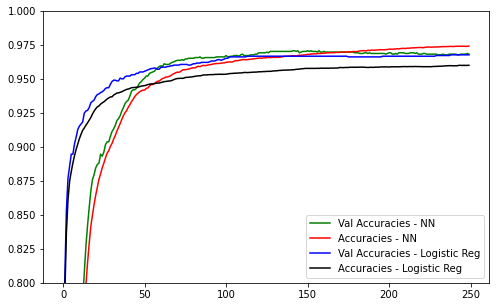

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

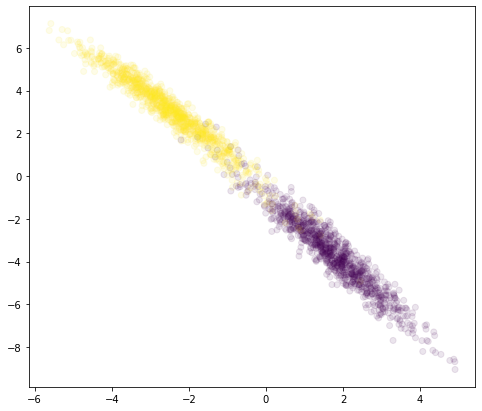

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

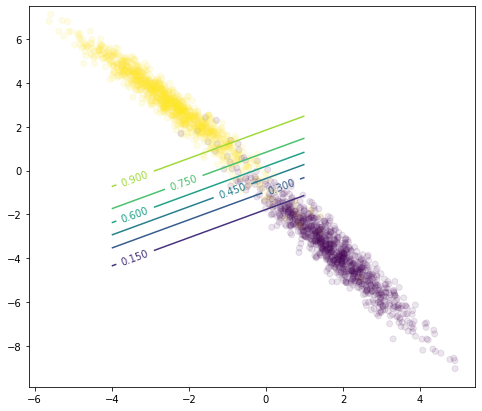

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );